## **AIVLE School 미니프로젝트 5기 AI트랙 2차** ##
## **공공데이터를 활용한 <span style="color:skyblue">미세먼지 농도</span> 예측**
---

## [step 3] 모델링

## **0.프로젝트 소개**

### (1) 수행 목표
- 미세먼지 농도를 예측하는 머신러닝 모델을 만드세요.

#### 우리가 풀어야 하는 문제는 무엇인가요? 
* 서울 지역의 미세먼지 데이터와 날씨 데이터를 활용하여,
미세먼지 예측에 관련 있는 데이터 항목으로 데이터를 구성, 전처리 하여 
미세먼지 농도를 예측하는 머신러닝 모델 구현


### (2) 데이터 소개

#### 1) 기본 데이터

* 학습 데이터
    * air_2022.csv : 2022년 미세먼지 데이터
    * weather_2022.csv : 2022년 날씨 데이터
* 테스트 데이터
    * air_2023.csv : 2023년 미세먼지 데이터
    * weather_2023.csv : 2023년 날씨 데이터

#### 2) 데이터셋의 변수 소개(weather_2022,2023)

* 증기압: 증기가 고체 또는 액체와 동적 평형 상태에 있을 때 증기의 압력 (증기가 되려는 힘)
* 이슬점 온도: 불포화 상태의 공기가 냉각될 때, 포화 상태에 도달하여 수증기의 응결이 시작되는 온도
* 일조: 일정한 물체나 땅의 겉면에 태양 광선이 비치는 시간 (1시간 중 비율)
* 일사(량): 태양으로부터 오는 태양 복사 에너지가 지표에 닿는 양 (면적당 에너지 량)
* 전운량: 하늘을 육안으로 관측하여 전부 구름일 때 10, 구름이 덮고 있는 하늘의 비율에 따라 0~10
* 중하층운량: 중층과 하층에 있는 구름의 분포량(중하층 구름이 날씨에 영향 주므로 따로 표기)
* 운형(운형약어): 구름의 종류. 약어 코드로 기재됨
* 최저운고: 가장 낮은 구름의 높이
* 현상번호(국내식): 비, 소낙비, 싸락눈, 눈보라 등의 기상현상을 나타낸 코드번호
* 지면온도: 지면 0cm 온도
* 지중온도: 땅 속 온도변수1

## **1.환경설정**

* 세부 요구사항
    - 경로 설정 : 다음의 두가지 방법 중 하나를 선택하여 폴더를 준비하고 데이터를 로딩하시오.
        * 1) 로컬 수행(Ananconda)
            * 제공된 압축파일을 다운받아 압축을 풀고
            * anaconda의 root directory(보통 C:/Users/< ID > 에 project 폴더를 만들고, 복사해 넣습니다.
        * 2) 구글코랩
            * 구글 드라이브 바로 밑에 project 폴더를 만들고, 
            * 데이터 파일을 복사해 넣습니다.
            
    - 기본적으로 필요한 라이브러리를 import 하도록 코드가 작성되어 있습니다. 
        * 필요하다고 판단되는 라이브러리를 추가하세요.

### (1) 경로 설정
* 로컬환경 또는 구글 코랩 중 하나를 사용하시면 됩니다.

#### 1) 로컬 수행(Anaconda)
* project 폴더에 필요한 파일들을 넣고, 본 파일을 열었다면, 별도 경로 지정이 필요하지 않습니다.

In [1]:
path = 'C:/Users/User/project/'

#### 2) 구글 코랩 수행

* 구글 드라이브 연결

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
# path = '/content/drive/MyDrive/project/'

### (2) 라이브러리 설치 및 불러오기

#### 1) 라이브러리 설치 및 로딩

In [1]:
# 필요한 라이브러리 설치 및 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

from statsmodels.graphics.mosaicplot import mosaic
from scipy import stats as spst
import statsmodels.api as sm
import joblib

# 더 필요한 라이브러리를 아래에 추가합니다.

import pandas as pd

from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.tree import DecisionTreeRegressor as DTR
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.ensemble import GradientBoostingRegressor as GBR
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import recall_score as recall
import joblib

In [2]:
# 시각화 한글폰트 설정을 위해 아래 코드를 실행하세요.
plt.rc('font', family='Malgun Gothic')
sns.set(font="Malgun Gothic",#"NanumGothicCoding", 
        rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
        style='darkgrid')

### (3) 데이터 불러오기
* 주어진 데이터셋
    * 미세먼지 및 날씨 데이터 : train_x.csv / train_y.csv / test_x.csv / test_y.csv

#### 1) 데이터 로딩

In [10]:
# train_x.csv / train_y.csv / test_x.csv / test_y.csv 4개의 데이터 로딩
x_train = pd.read_csv('train_x.csv')
x_test = pd.read_csv('test_x.csv')
y_train = pd.read_csv('train_y.csv')
y_test = pd.read_csv('test_y.csv')

In [12]:
# x_train.drop(['time'],axis=1, inplace=True)
# x_test.drop(['time'], axis=1, inplace=True)

x_train.drop(['time','PM10', 'PM25'],axis=1, inplace=True)
x_test.drop(['time','PM10', 'PM25'], axis=1, inplace=True)

#### 2) 기본 정보 조회
* 로딩한 데이터의 기본 정보를 확인 합니다(info 등..)

In [13]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((8760, 30), (8760, 1), (5832, 30), (5832, 1))

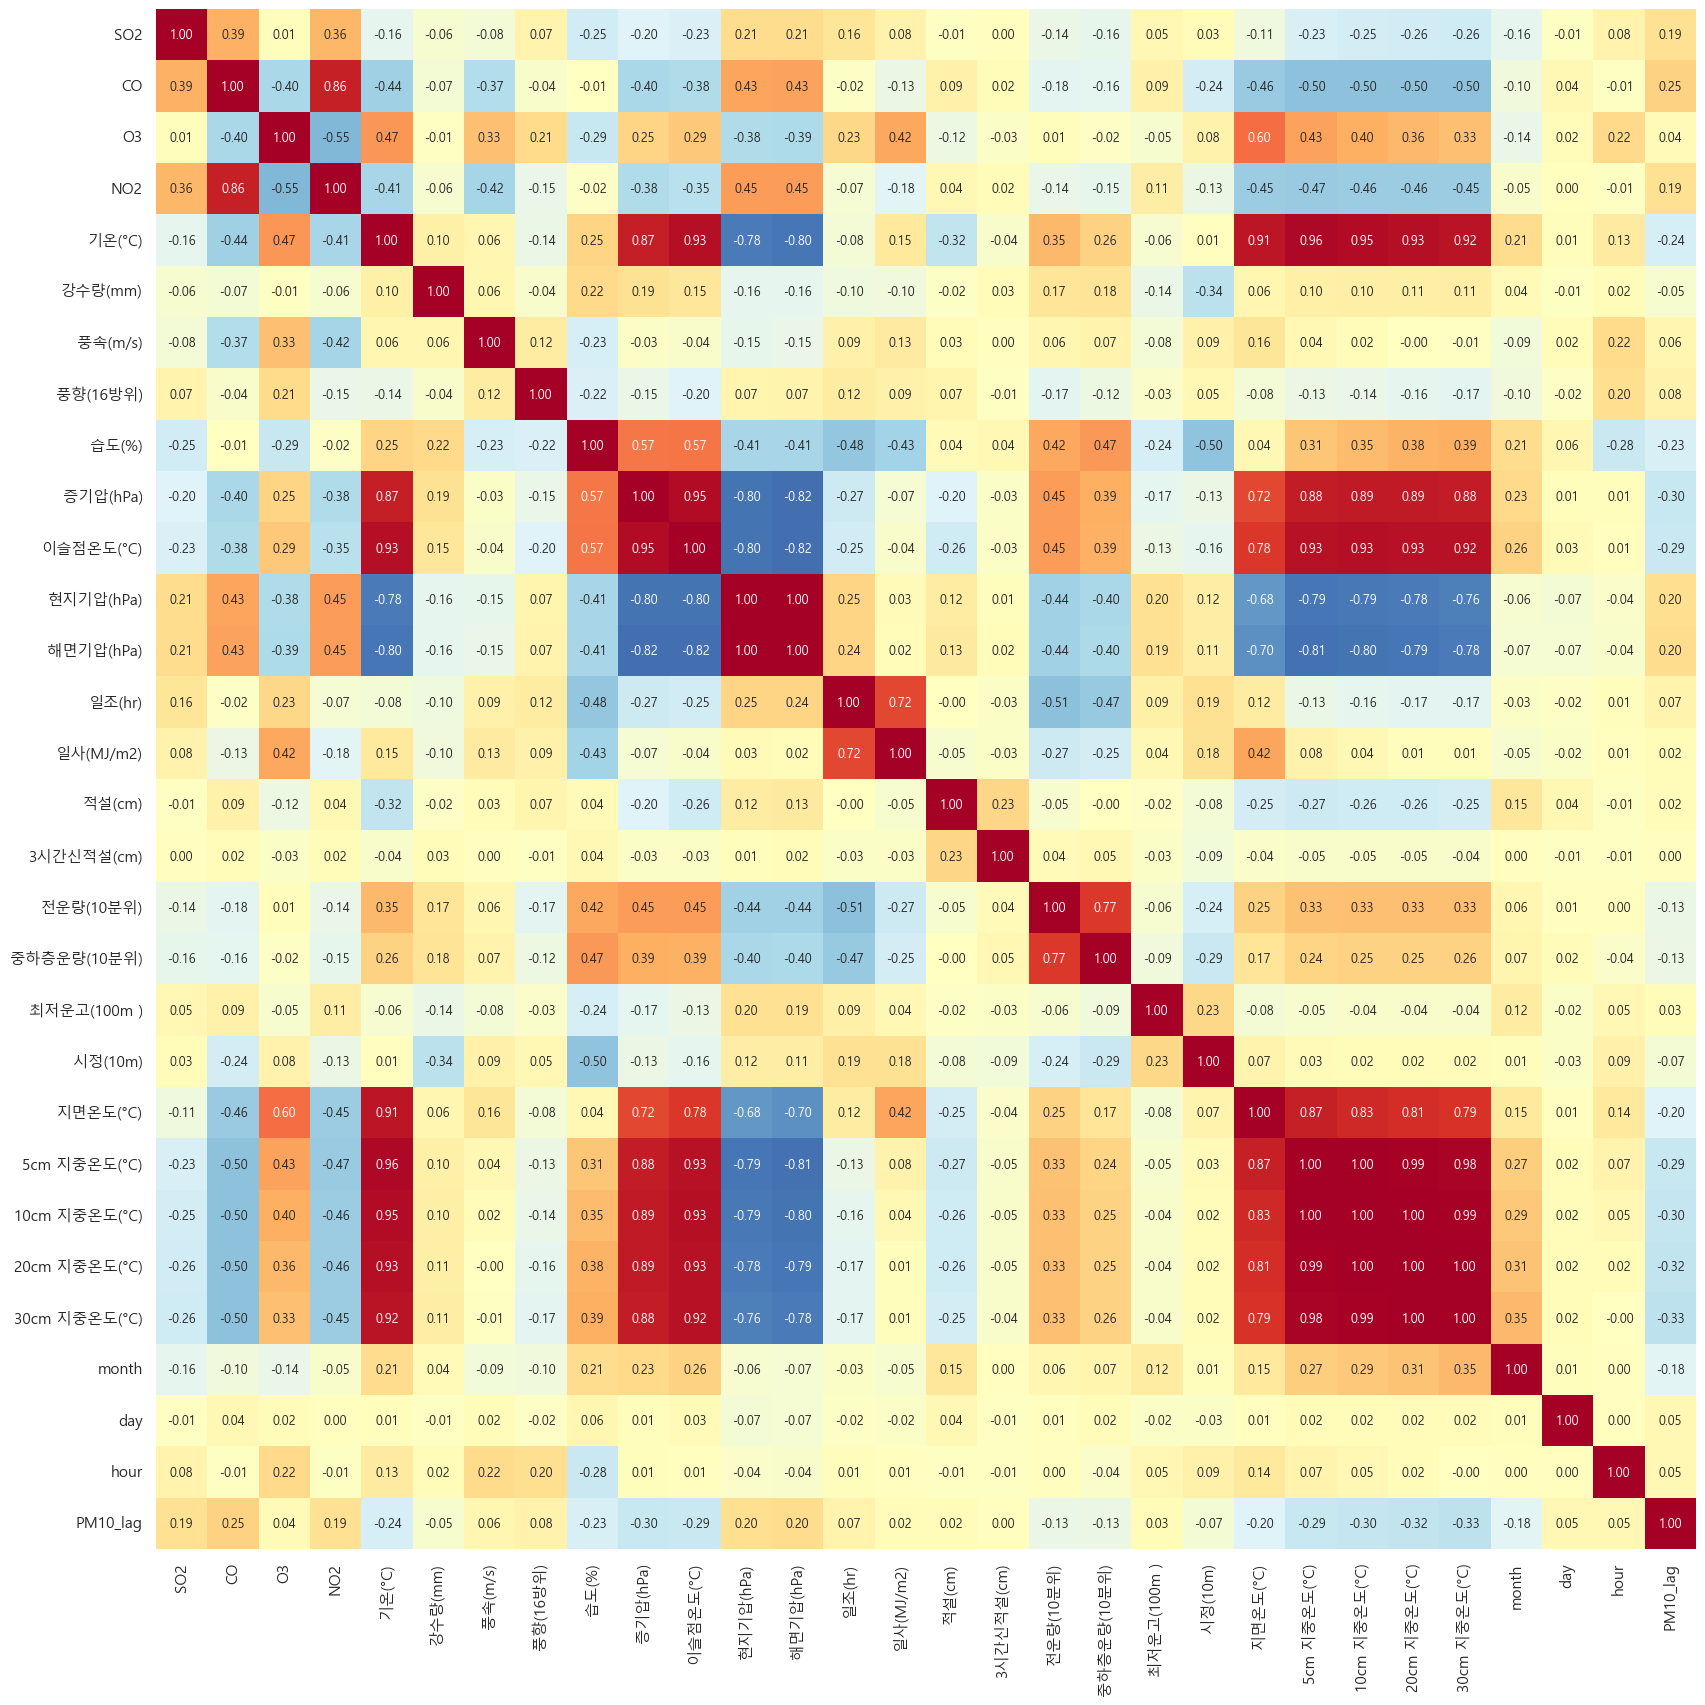

In [14]:
plt.rcParams['figure.figsize'] = (20,20)
sns.heatmap(x_train.corr(numeric_only=True),
           annot = True,
           cmap = 'RdYlBu_r',
            vmin = -1,
            vmax = 1,
           square = True,
           cbar = False,
           fmt = '.2f',
           annot_kws = {'size' : 9})
plt.rcParams['figure.figsize'] = (5,5)

In [15]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from tqdm import tqdm

In [16]:
vif = pd.DataFrame()
vif['VIF_Factor'] = [variance_inflation_factor(x_train.values, i) for i in tqdm(range(x_train.shape[1]))]
vif['Feature'] = x_train.columns

100%|██████████████████████████████████████████████████████████████████████████████████| 30/30 [00:01<00:00, 29.79it/s]


In [17]:
vif = vif.sort_values(by='VIF_Factor', ascending=False).reset_index().drop(columns='index')
vif

,VIF_Factor,Feature
0,7.901799e+08,현지기압(hPa)
1,7.893548e+08,해면기압(hPa)
2,1.865820e+04,10cm 지중온도(°C)
3,1.719131e+04,20cm 지중온도(°C)
4,4.752608e+03,5cm 지중온도(°C)
5,4.369136e+03,30cm 지중온도(°C)
6,1.178262e+03,기온(°C)
7,7.179940e+02,습도(%)
8,5.004350e+02,이슬점온도(°C)
9,6.404089e+01,지면온도(°C)


## **2.머신러닝 모델링**

### (1) 모델링: LinearRegression

* Train과 Test로 나눈 데이터를 기준으로 LinearRegression 모델링을 진행하고 평가를 해주세요.
* 그리고 모델 파일을 pkl로 저장해주세요.
* 성능지표 : MSE, R-squared Score(소수점 5째자리까지)

In [18]:
# LinearRegression 코드를 작성하세요.
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [19]:
# predict로 예측하여 y_pred_LR에 저장해보세요.
y_pred_LR = model.predict(x_test)

In [20]:
# test_y 데이터와 y_pred_LR 데이터로 성능을 평가하여 출력해보세요.
# 성능지표는 mse와 r2를 이용하세요.

print("MSE:", mse(y_test, y_pred_LR))
print("R2:", r2_score(y_test, y_pred_LR))

MSE: 708.269189905342
R2: 0.3679164466101258


In [21]:
# 학습한 모델을 pkl 파일로 저장해보세요.(joblib 활용)
filename = 'model_lr.pkl'

# 모델을 pkl 파일로 저장
joblib.dump(model, filename)
print("모델이 성공적으로 저장되었습니다.")

모델이 성공적으로 저장되었습니다.


### (2) 모델링: 랜덤포레스트

* 랜덤포레스트: 배깅의 일종으로 의사결정나무(Decision Tree) 여러 개를 모아서 숲을 랜덤으로 구성하고 이를 종합해서 최종 모델을 산출하는 기법
* Train과 Test로 나눈 데이터를 기준으로 렌덤포레스트로 모델을 학습을 진행하고 평가를 해주세요.
* 그리고 모델 파일을 pkl로 저장해주세요.
* 성능지표 : MSE, R-squared Score(소수점 5째자리까지)

In [22]:
# 랜덤포레스트로 모델 학습 진행 하고 성능을 평가하여 출력해 보세요.
# 성능평가는 MSE, R-Squared Score

model =  RFR(random_state = 1,
            max_depth = 10)

model.fit(x_train, y_train.values.ravel())
y_pred_rf = model.predict(x_test)
print("MSE:", mse(y_test, y_pred_rf))
print("R2:", r2_score(y_test, y_pred_rf))

MSE: 656.7713114430017
R2: 0.41387490770719293


In [23]:
# 학습한 모델을 파일로 저장해보세요.(joblib 활용)
filename = 'model_rf.pkl'

# 모델을 pkl 파일로 저장
joblib.dump(model, filename)
print("모델이 성공적으로 저장되었습니다.")

모델이 성공적으로 저장되었습니다.


### (2-1) 랜덤포레스트 feature_importances 확인
* 렌덤포레스트로 학습한 모델의 feature_importances를 구해보세요.

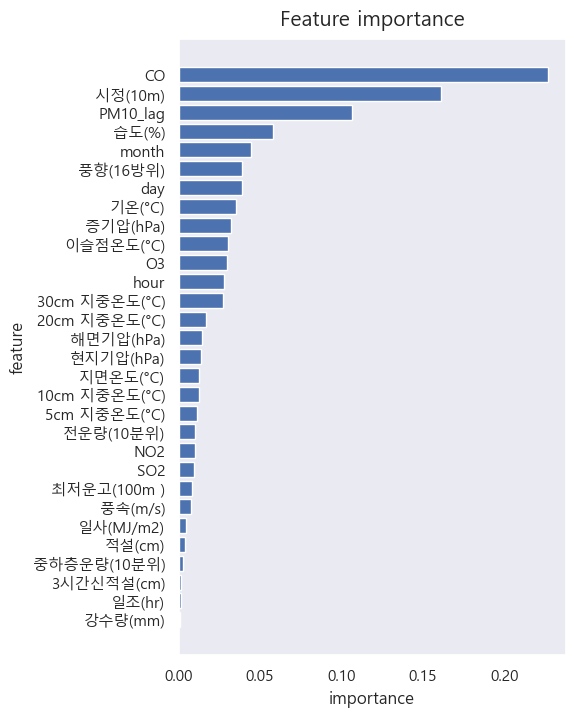

In [24]:
# 렌덤포레스트로 학습한 모델의 feature_importances를 구해보세요.
# 아래에 필요한 코드를 작성하고 결과를 확인합니다.

df = pd.DataFrame()
df['feature'] = list(x_train)
df['importance'] = model.feature_importances_
df.sort_values(by='importance', ascending=True, inplace=True)

plt.figure(figsize=(5,8))
plt.barh(df['feature'], df['importance'])
plt.title("Feature importance", size =15, pad=10)
plt.xlabel("importance")
plt.ylabel("feature")
plt.grid()
plt.show()

### (3) 모델링: GradientBoosting

* GradientBoosting: 앞선 모델의 에러를 다음 모델의 예측 값으로 활용하면서 가중치 업데이트 하는데 경사하강법(Gradient Descent)를 활용해서 최적 모델을 만드는 기법
* Train과 Test로 나눈 데이터를 기준으로 그라디언트부스팅으로 모델을 학습을 진행하고 평가를 해주세요.
* 그리고 모델 파일을 pkl로 저장해주세요.
* 성능지표 : MSE, R-squared Score(소수점 5째자리까지)

In [25]:
# 아래에 필요한 코드를 작성하고 결과를 확인합니다.

# 랜덤포레스트로 모델 학습 진행 하고 성능을 평가하여 출력해 보세요.
# 성능평가는 MSE, R-Squared Score


model =  GBR(random_state = 1,
            max_depth = 5)

model.fit(x_train, y_train.values.ravel())
y_pred_gb = model.predict(x_test)
print("MSE:", mse(y_test, y_pred_gb))
print("R2:", r2_score(y_test, y_pred_gb))

MSE: 617.8689186937585
R2: 0.44859272826860475


In [26]:
# 학습한 모델을 파일로 저장해보세요.(joblib 활용)
filename = 'model_gb.pkl'

# 모델을 pkl 파일로 저장
joblib.dump(model, filename)
print("모델이 성공적으로 저장되었습니다.")

모델이 성공적으로 저장되었습니다.


### (3-1) 그라디언트부스팅 feature_importances 확인
* 학습한 모델의 feature_importances를 구해보세요.

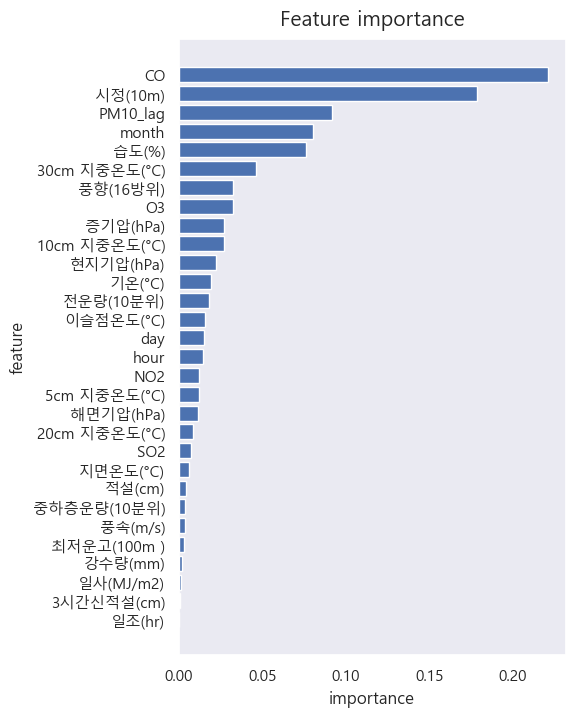

In [27]:
# 그라디언트부스팅으로 학습한 모델의 feature_importances를 구해보세요.
# 아래에 필요한 코드를 작성하고 결과를 확인합니다.
df = pd.DataFrame()
df['feature'] = list(x_train)
df['importance'] = model.feature_importances_
df.sort_values(by='importance', ascending=True, inplace=True)

plt.figure(figsize=(5,8))
plt.barh(df['feature'], df['importance'])
plt.title("Feature importance", size =15, pad=10)
plt.xlabel("importance")
plt.ylabel("feature")
plt.grid()
plt.show()

In [28]:
# 확인 후 알수 있었던 인사이트가 있었으면 정리해보세요!
x_train[['CO', '습도(%)', '시정(10m)']]

,CO,습도(%),시정(10m)
0,0.4,41,2000
1,0.4,42,2000
2,0.5,43,2000
3,0.5,46,2000
4,0.5,48,2000
...,...,...,...
8755,1.5,73,1211
8756,1.6,75,1171
8757,1.7,77,1134
8758,1.8,78,1094


### (4) 모델링: Self Choice Model 

* Self Choice Model: 앞선 교육과정에서 배운 머신러닝 모델 중 어떤 것이든 좋습니다. 원하는 모델을 선택해서 학습을 시켜보세요.
* Train과 Test로 나눈 데이터를 기준으로 Self Choice Model로 모델을 학습을 진행하고 평가를 해주세요.
* 그리고 모델 파일을 pkl로 저장해주세요.
* 성능지표 : MSE, R-squared Score(소수점 5째자리까지)

In [ ]:
# 아래에 필요한 코드를 작성하고 결과를 확인합니다.


In [ ]:
# Test 데이터로 성능을 평가해보세요.



In [ ]:
# 학습한 모델을 파일로 저장해보세요.




In [27]:
# 시간이 되면 Seif choice Model로 학습한 모델의 feature_importances를 구해보세요.
# 확인 후 알수 있었던 인사이트가 있었으면 정리해보세요!

# 고생하셨습니다👍👍 

In [208]:
data = x_train[['CO', '습도(%)', '시정(10m)', '현지기압(hPa)']]
data = pd.concat([data, y_train], axis = 1)

In [209]:
data

,CO,습도(%),시정(10m),현지기압(hPa),PM10_1
0,0.4,41,2000,1021.9,20.0
1,0.4,42,2000,1022.2,20.0
2,0.5,43,2000,1022.3,19.0
3,0.5,46,2000,1022.6,24.0
4,0.5,48,2000,1021.9,19.0
...,...,...,...,...,...
8755,1.5,73,1211,1018.5,76.0
8756,1.6,75,1171,1018.1,76.0
8757,1.7,77,1134,1018.2,77.0
8758,1.8,78,1094,1018.3,76.0


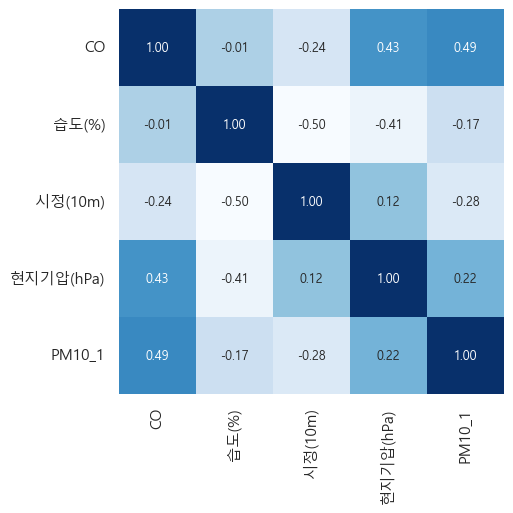

In [210]:
sns.heatmap(data.corr(numeric_only=True),
           annot = True,
           cmap = 'Blues',
           square = True,
           cbar = False,
           fmt = '.2f',
           annot_kws = {'size' : 9})
plt.show()

In [211]:
x_train.columns

Index(['SO2', 'CO', 'O3', 'NO2', 'PM10', 'PM25', '기온(°C)', '강수량(mm)',
       '풍속(m/s)', '풍향(16방위)', '습도(%)', '증기압(hPa)', '이슬점온도(°C)', '현지기압(hPa)',
       '해면기압(hPa)', '일조(hr)', '일사(MJ/m2)', '적설(cm)', '3시간신적설(cm)', '전운량(10분위)',
       '중하층운량(10분위)', '최저운고(100m )', '시정(10m)', '지면온도(°C)', '5cm 지중온도(°C)',
       '10cm 지중온도(°C)', '20cm 지중온도(°C)', '30cm 지중온도(°C)', 'month', 'day',
       'hour', 'PM10_lag'],
      dtype='object')

In [ ]:
sns.heatmap(data.corr(numeric_only=True),
           annot = True,
           cmap = 'Blues',
           square = True,
           cbar = False,
           fmt = '.2f',
           annot_kws = {'size' : 9})
plt.show()

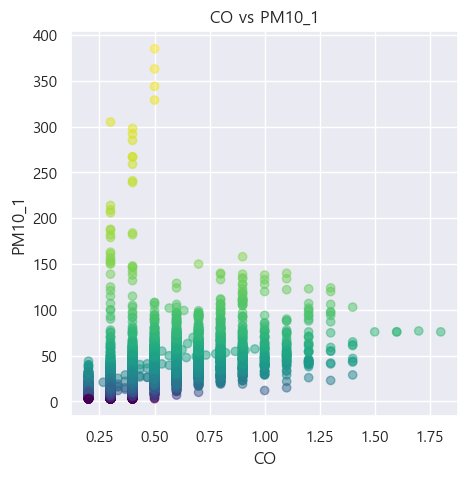

In [164]:
# 단변량 분석
# CO, 습도(%), 시정(10m), 현지기압(hpa) :
# x_train[['CO']], y_train['PM10_1']

# 그래프를 그릴 변수들을 선택합니다.
x = x_train[['CO']]
y = y_train['PM10_1']

# 그래프를 그립니다.
plt.scatter(x, y, c=np.log(y), cmap='viridis', alpha=0.5)  # 산점도를 그립니다.
plt.title('CO vs PM10_1')  # 그래프 제목을 추가합니다.
plt.xlabel('CO')  # x축 레이블을 추가합니다.
plt.ylabel('PM10_1')  # y축 레이블을 추가합니다.
plt.show()  # 그래프를 표시합니다.

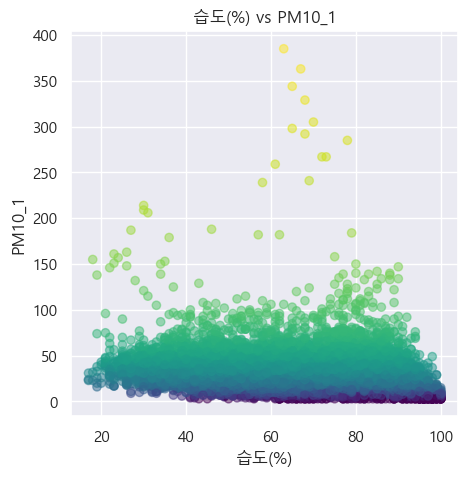

In [172]:
# 그래프를 그릴 변수들을 선택합니다.
x = x_train[['습도(%)']]
y = y_train['PM10_1']

# 그래프를 그립니다.
plt.scatter(x, y, c=np.log(y), cmap='viridis', alpha=0.5)  # 산점도를 그립니다.
plt.title('습도(%) vs PM10_1')  # 그래프 제목을 추가합니다.
plt.xlabel('습도(%)')  # x축 레이블을 추가합니다.
plt.ylabel('PM10_1')  # y축 레이블을 추가합니다.
plt.show()  # 그래프를 표시합니다.